In [1]:
#TODO visualisation
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
np.random.seed(0)

# исходные параметры распределений классов
r1 = 0.6
D1 = 3.0
mean1 = [1, -2]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [-2, -1]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

# model train sample
N = 500
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T

data_x = np.hstack([x1, x2]).T
data_y = np.hstack([np.ones(N) * -1, np.ones(N)])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,\
                                                    test_size=0.4, shuffle=True)

In [3]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
a = clf.predict(x_test)

Q = (a != y_test).mean()
Q

np.float64(0.08)

In [4]:
# compare with linear kernel
clif = svm.SVC(kernel='linear')
clif.fit(x_train, y_train)
al = clif.predict(x_test)
w = clif.coef_[0]
w0 = clif.intercept_[0]
w = [w0, *w]
Ql = (a != y_test).mean()
Ql

np.float64(0.08)

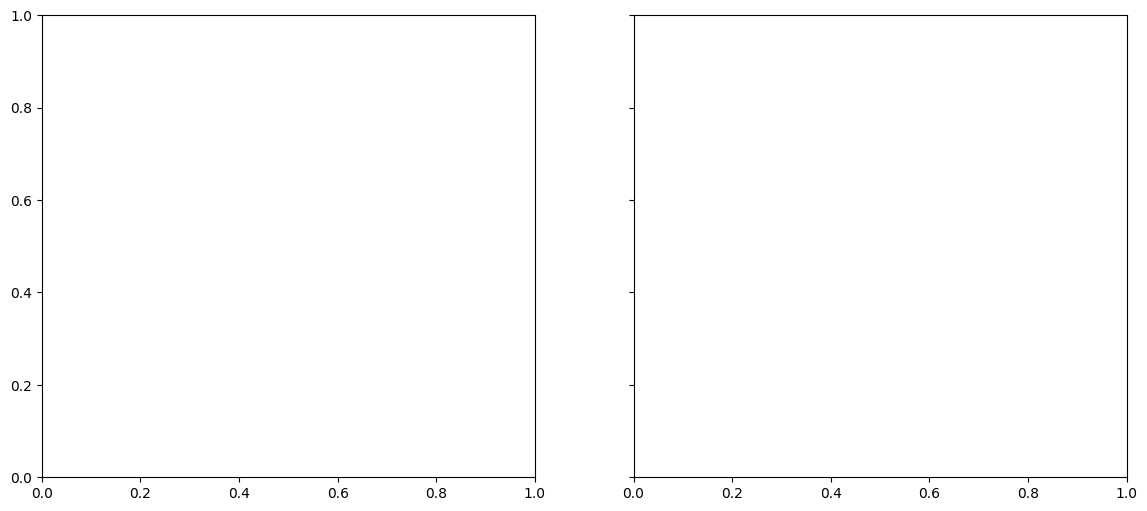

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=1)


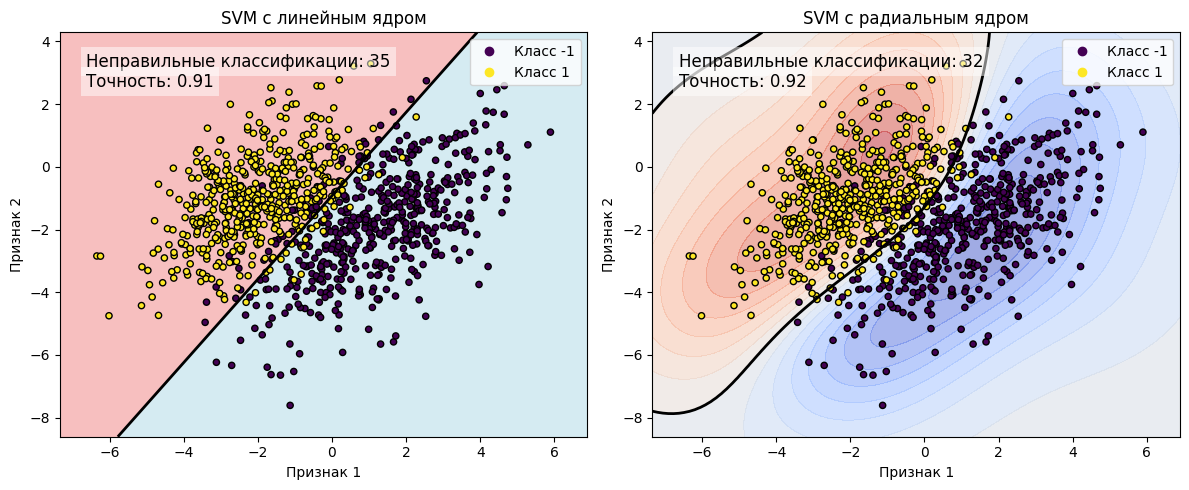

In [6]:
# Функция для построения графиков
def plot_svc_decision_boundary(clf, X, y, ax, title, radial=False):
    # Создание сетки для графика
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Предсказание на сетке
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Построение заливки
    if radial:
        # Многослойная заливка для радиального ядра
        ax.contourf(xx, yy, Z, levels=[Z.min(), 0], colors=['lightblue'], alpha=0.5)  # Заливка для класса -1
        ax.contourf(xx, yy, Z, levels=[0, Z.max()], colors=['lightcoral'], alpha=0.5)  # Заливка для класса 1
    else:
        # Простая заливка для линейного ядра
        ax.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.5)

    # Построение границы решения
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    
    # Построение точек обучающей выборки
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
    ax.set_title(title)
    ax.set_xlabel('Признак 1')  # Подпись оси X
    ax.set_ylabel('Признак 2')  # Подпись оси Y

    # Подсчет неправильных классификаций и точности
    misclassifications = calculate_misclassifications(clf, x_test, y_test)
    accuracy = accuracy_score(y_test, clf.predict(x_test))

    # Добавление текста с количеством неправильных классификаций и точностью
    ax.text(0.05, 0.95, f'Неправильные классификации: {misclassifications}', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top', 
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    
    ax.text(0.05, 0.90, f'Точность: {accuracy:.2f}', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top', 
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

    # Добавление легенды
    handles, labels = scatter.legend_elements()
    ax.legend(handles, ['Класс -1', 'Класс 1'], loc='upper right')

def calculate_misclassifications(clf, X_test, y_test):
    """Функция для подсчета неправильных классификаций."""
    predictions = clf.predict(X_test)
    misclassifications = np.sum(predictions != y_test)
    return misclassifications

# Создание графиков
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Указываем, что радиальный график использует многослойную заливку
plot_svc_decision_boundary(clif, data_x, data_y, axs[0], "SVM с линейным ядром", radial=True)
plot_svc_decision_boundary(clf, data_x, data_y, axs[1], "SVM с радиальным ядром", radial=False)

plt.tight_layout()
plt.show()